In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Primeras filas
titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.shape

(891, 12)

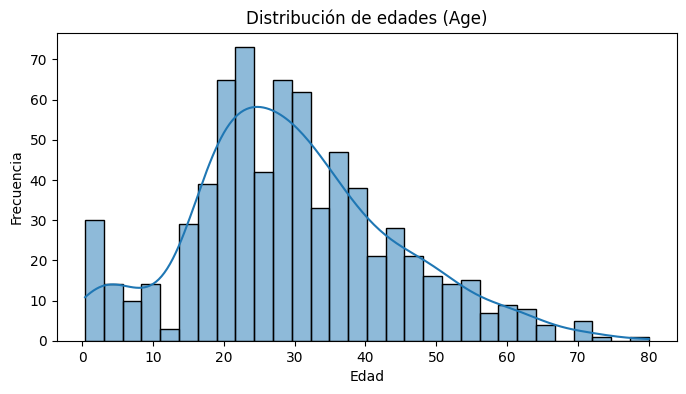

In [3]:
plt.figure(figsize=(8,4))
sns.histplot(titanic["Age"], bins=30, kde=True)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

**Interpretación**

*La edad se concentra fuertemente en adultos jóvenes (aprox. 20–40).

*Hay una cola hacia edades mayores y un grupo pequeño de niños.

*Se observan valores faltantes (la gráfica “salta” un poco porque Age tiene NaNs).




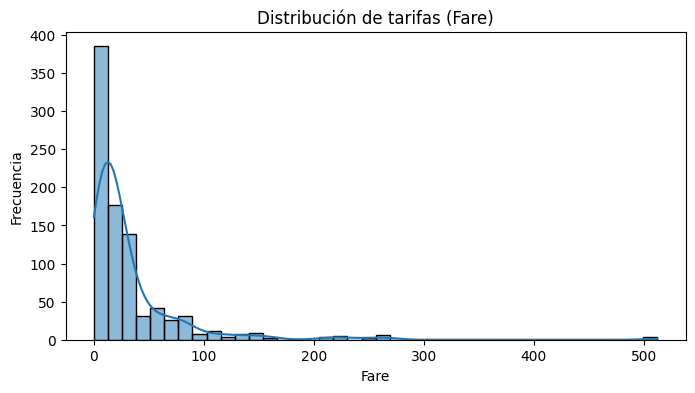

In [4]:
plt.figure(figsize=(8,4))
sns.histplot(titanic["Fare"], bins=40, kde=True)
plt.title("Distribución de tarifas (Fare)")
plt.xlabel("Fare")
plt.ylabel("Frecuencia")
plt.show()


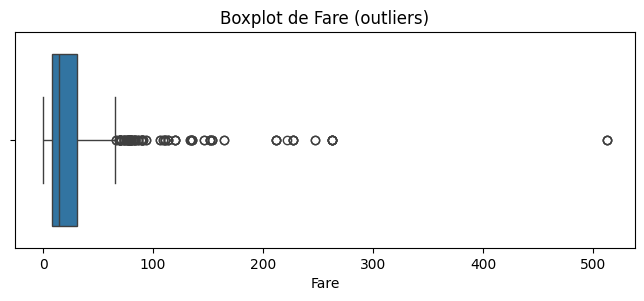

In [5]:
plt.figure(figsize=(8,2.8))
sns.boxplot(x=titanic["Fare"])
plt.title("Boxplot de Fare (outliers)")
plt.xlabel("Fare")
plt.show()


Fare está muy sesgada a la derecha: muchas tarifas bajas y pocas muy altas.

Hay outliers fuertes (personas que pagaron muchísimo).

# Hipótesis
Los outliers pueden existir por:boletos de primera clase extremadamente caros,personas pagando por cabinas premium, o tarifas asociadas a tickets compartidos que inflan Fare total.

# Parte 4: Covariación (¿Cómo se relacionan las variables?)
**¿Las personas que pagaron tarifas extremadamente altas (top 10%) tuvieron un patrón de supervivencia distinto incluso dentro de primera clase?**

In [9]:
# Calcular percentil 90
fare_90 = titanic["Fare"].quantile(0.90)
titanic["Top10Fare"] = titanic["Fare"] >= fare_90
fare_90


np.float64(77.9583)

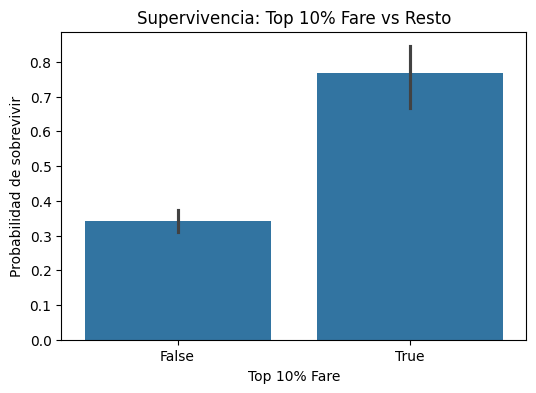

,Survived
Top10Fare,
False,0.340824
True,0.766667


In [12]:
plt.figure(figsize=(6,4))
sns.barplot(x="Top10Fare", y="Survived", data=titanic, estimator=np.mean)
plt.title("Supervivencia: Top 10% Fare vs Resto")
plt.ylabel("Probabilidad de sobrevivir")
plt.xlabel("Top 10% Fare")
plt.show()

titanic.groupby("Top10Fare")["Survived"].mean()


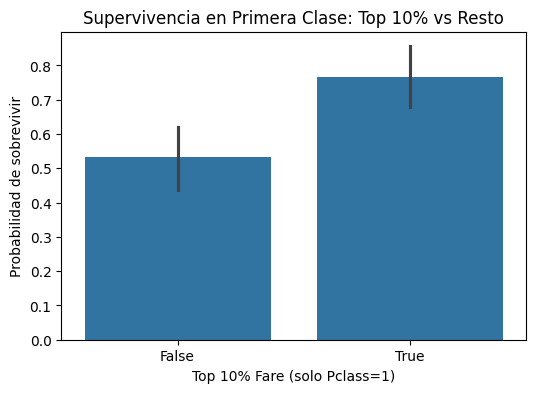

,Survived
Top10Fare,
False,0.531746
True,0.766667


In [10]:
primera_clase = titanic[titanic["Pclass"] == 1]

plt.figure(figsize=(6,4))
sns.barplot(x="Top10Fare", y="Survived", data=primera_clase, estimator=np.mean)
plt.title("Supervivencia en Primera Clase: Top 10% vs Resto")
plt.ylabel("Probabilidad de sobrevivir")
plt.xlabel("Top 10% Fare (solo Pclass=1)")
plt.show()

primera_clase.groupby("Top10Fare")["Survived"].mean()


El análisis muestra que el efecto de la tarifa elevada no se explica únicamente por pertenecer a primera clase. Incluso dentro de este grupo privilegiado, los pasajeros que pagaron tarifas dentro del 10% más alto tuvieron una probabilidad de supervivencia considerablemente mayor que aquellos que pagaron menos.

In [16]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
pip install missingno

# Parte 3: Valores Faltantes

<Axes: >

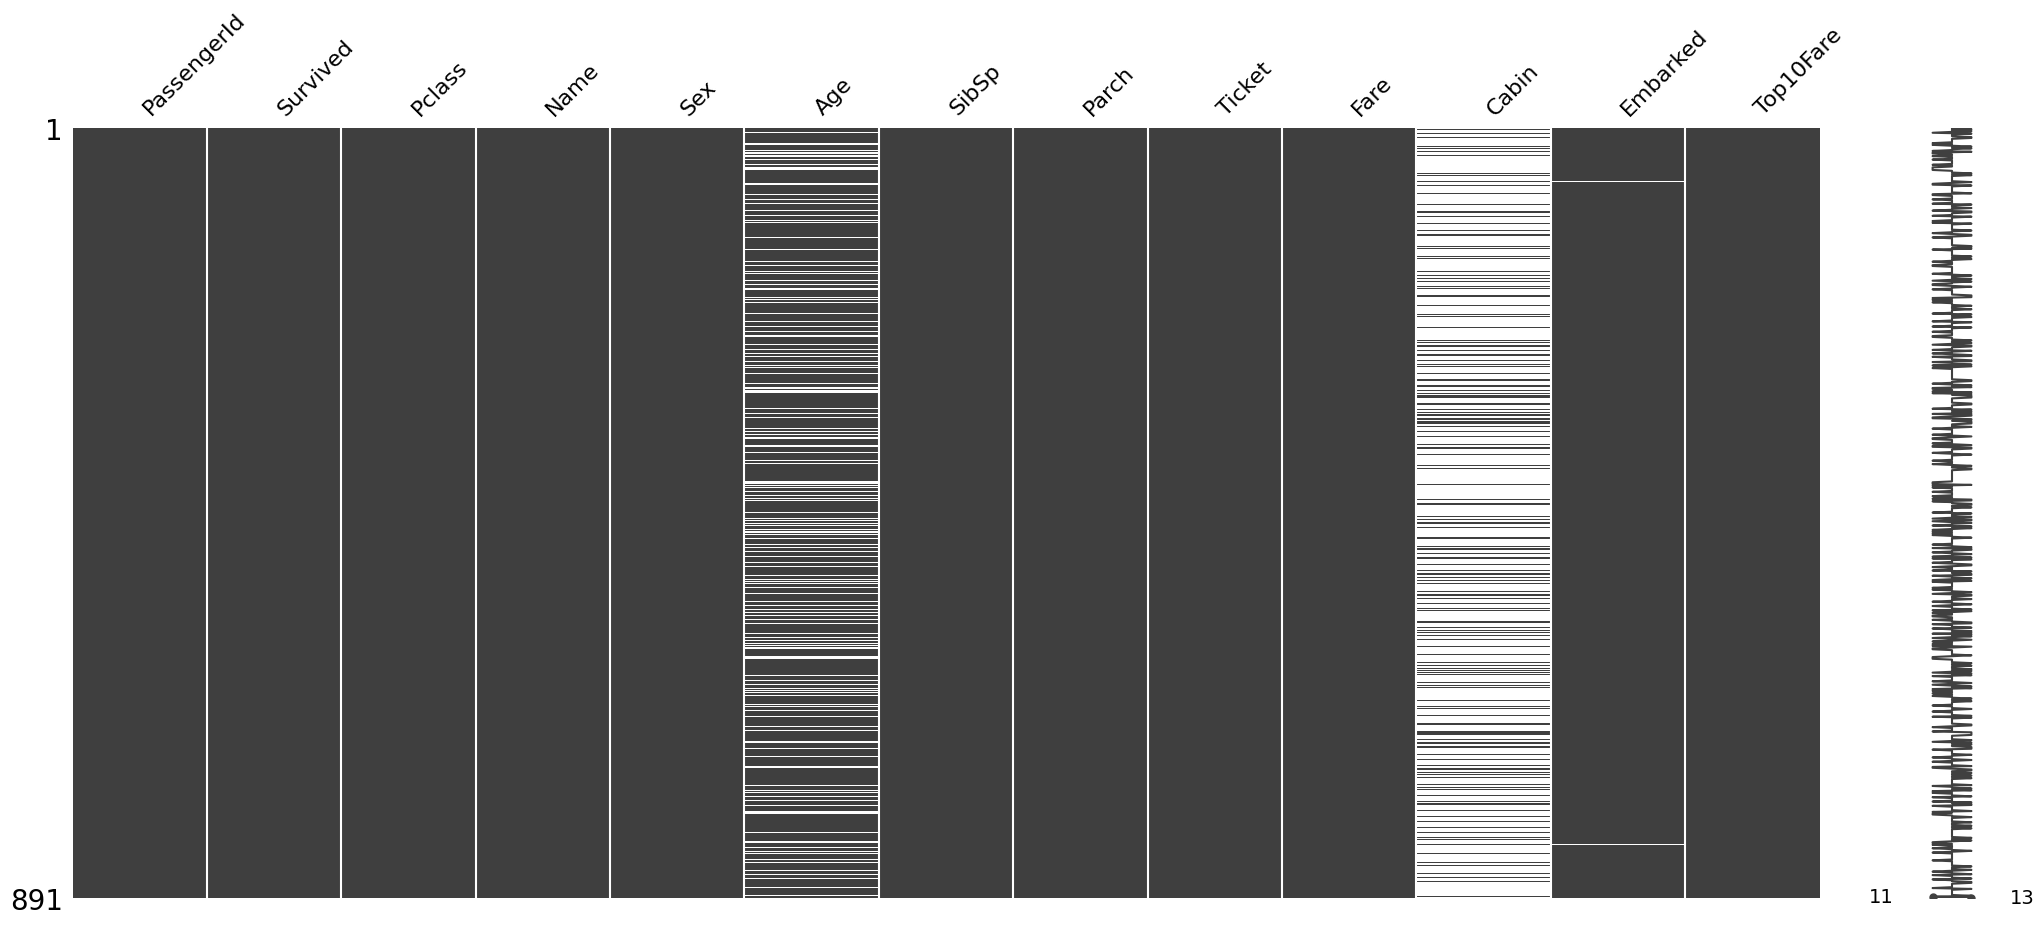

In [18]:
import missingno as msno
msno.matrix(titanic)

¿Qué variables tienen valores faltantes?

age,embarked, cabin

¿Los valores faltantes son aleatorios o siguen un patrón? (ej: ¿la edad faltante está relacionada con la clase del pasajero?)

No esta tan fuerte relacionada,

¿Cómo manejarían estos valores faltantes? Justifiquen su respuesta.

puedes usar una moda, de los valores que mas se repiten para complementar los faltantes

In [19]:
titanic["Age_missing"] = titanic["Age"].isnull().astype(int)

pd.crosstab(titanic["Pclass"], titanic["Age_missing"], normalize="index")


Age_missing,0,1
Pclass,,
1,0.861111,0.138889
2,0.940217,0.059783
3,0.723014,0.276986


# Parte 2: Covariación (mínimo 3 relaciones)

Relación 1: ¿La supervivencia fue diferente por género?

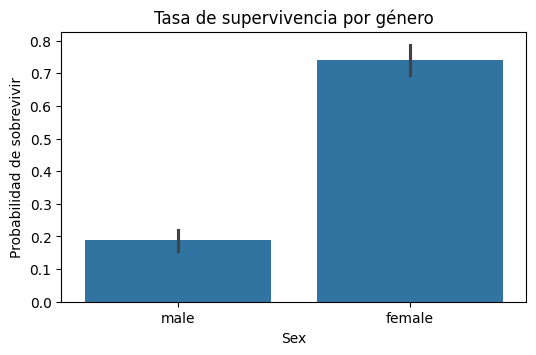

In [20]:
plt.figure(figsize=(6,3.5))
sns.barplot(x="Sex", y="Survived", data=titanic, estimator=np.mean)
plt.title("Tasa de supervivencia por género")
plt.ylabel("Probabilidad de sobrevivir")
plt.show()


Normalmente verás supervivencia mucho mayor en mujeres.

Conecta con la idea histórica de prioridad de evacuación en muchos casos.

Relación 2: ¿La supervivencia cambia según la clase (Pclass)?

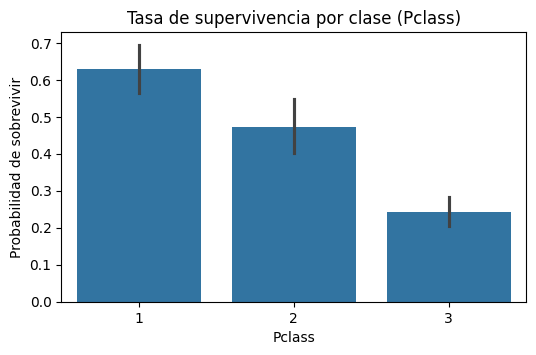

In [21]:
plt.figure(figsize=(6,3.5))
sns.barplot(x="Pclass", y="Survived", data=titanic, estimator=np.mean)
plt.title("Tasa de supervivencia por clase (Pclass)")
plt.ylabel("Probabilidad de sobrevivir")
plt.show()


Usualmente la 1ra clase sobrevive más, 3ra clase menos.

Relación 3: ¿La edad se relaciona con la supervivencia?

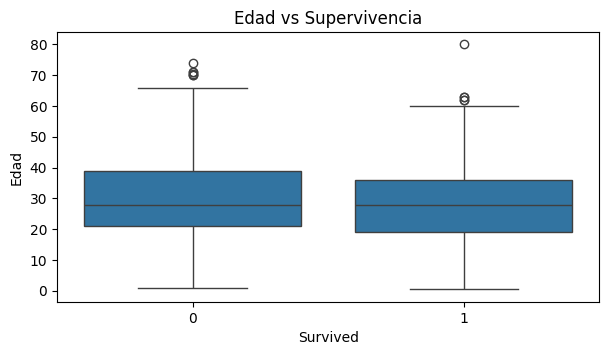

In [23]:
plt.figure(figsize=(7,3.5))
sns.boxplot(x="Survived", y="Age", data=titanic)
plt.title("Edad vs Supervivencia")
plt.xlabel("Survived")
plt.ylabel("Edad")
plt.show()


Si los grupos jóvenes sobreviven más, es consistente con prioridad de evacuación.

**CONCLUSIÓN**

Lo más difícil del análisis exploratorio fue decidir qué gráfico usar para cada pregunta sin caer en conclusiones apresuradas, y lidiar con variables clave que tienen muchos valores faltantes, porque esos huecos no son casuales y pueden sesgar todo lo que interpreto si no los pienso bien. Lo más valioso que he aprendido es que el EDA es un proceso iterativo: empiezas viendo distribuciones, luego relaciones entre variables, detectas problemas como outliers o datos perdidos, y regresas a ajustar tus ideas. No se trata de hacer muchas gráficas por hacerlas, sino de usarlas para formular preguntas cada vez mejores y tomar decisiones conscientes sobre cómo limpiar y entender los datos.